In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data_visualize = pd.read_csv("noAirTemp_pd.csv")

data_visualize

,DAT,WL_Flume (m3/hour),WL_Flume_OUT (m3/hour),Solar (W/m2),Precipitation (mm),WindSpeed (m/s),RH (%),delta PD (mm)
0,164.791667,0.024406,0.156048,42,0.000,1.23,84.90,-0.1
1,164.833333,0.031719,0.136486,4,0.000,0.79,88.40,-0.1
2,164.875000,0.031719,0.136486,0,0.000,0.60,90.50,-0.1
3,164.916667,0.031719,0.060883,0,0.000,0.48,91.50,-0.1
4,164.958333,0.040201,0.049905,0,1.766,0.72,92.40,0.2
...,...,...,...,...,...,...,...,...
2442,267.250000,0.000000,0.000000,0,0.000,0.81,101.16,-0.1
2443,267.291667,0.000000,0.000000,12,0.000,0.76,101.20,0.0
2444,267.333333,0.000000,0.000000,82,0.017,0.88,101.22,0.0
2445,267.375000,0.000000,0.000000,195,0.000,0.76,101.22,0.0


In [8]:
LEARNING_RATE = 0.0001
TRAINNING_STEP = 200000
DISPLAY_STEP = 10000

X_LABLE = len(data_visualize.columns) - 1

In [9]:
data = np.loadtxt("noAirTemp_np.csv", delimiter = ',', dtype = np.float32)

x = data[:, :X_LABLE]
y = data[:, [-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

w1 = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
w2 = tf.Variable(tf.random.uniform([X_LABLE, 1], 0, 1))
bias = tf.Variable(random.random())

In [10]:
def compute_loss():
    hypothesis = tf.matmul(x_train * x_train, w1) + tf.matmul(x_train, w2) + bias
    loss = tf.reduce_mean((y_train - hypothesis) ** 2)
    
    return loss

optimizer = tf.optimizers.Adam(lr = LEARNING_RATE)

for step in range(1, TRAINNING_STEP + 1):
    optimizer.minimize(compute_loss, var_list = [w1, w2, bias])
    
    if step % DISPLAY_STEP == 0:
        print('step:', step, '\n', 'w1:\n', w1.numpy(), '\n', 'w2:\n', w2.numpy(), '\n', 
              'bias:', bias.numpy(), '\n', 'loss:', compute_loss().numpy(), '\n')

step: 10000 
 w1:
 [[-0.07736431]
 [ 0.8409822 ]
 [-0.334975  ]
 [ 0.00267347]
 [ 0.23021099]
 [ 0.1225075 ]
 [ 0.46258524]] 
 w2:
 [[-0.10555831]
 [ 0.27186215]
 [-0.4406399 ]
 [-0.3971257 ]
 [ 0.14420418]
 [ 0.4969387 ]
 [-0.02075906]] 
 bias: -0.17733495 
 loss: 1255607.0 

step: 20000 
 w1:
 [[-1.5405614e-04]
 [ 9.2559123e-01]
 [-8.0788326e-01]
 [ 4.3507837e-04]
 [-2.5189275e-01]
 [ 4.7088021e-01]
 [ 1.2462307e-02]] 
 w2:
 [[-0.26717526]
 [ 0.4092132 ]
 [-0.96646726]
 [-0.29171184]
 [-0.35410342]
 [ 0.7469721 ]
 [-0.4189282 ]] 
 bias: -0.48998335 
 loss: 2334.3855 

step: 30000 
 w1:
 [[-2.2837982e-04]
 [ 1.2131312e-01]
 [-6.3936926e-02]
 [ 2.0051134e-06]
 [ 1.8287914e-02]
 [-1.2929250e-01]
 [ 2.4117182e-03]] 
 w2:
 [[ 0.05675011]
 [-0.3913218 ]
 [-0.34224305]
 [ 0.00197124]
 [ 0.0743143 ]
 [ 0.47446206]
 [-0.25162065]] 
 bias: -0.11771058 
 loss: 17.532106 

step: 40000 
 w1:
 [[-1.94465087e-04]
 [ 1.94831826e-02]
 [ 1.81619488e-02]
 [-5.06041602e-07]
 [ 3.25565832e-03]
 [-1.08044

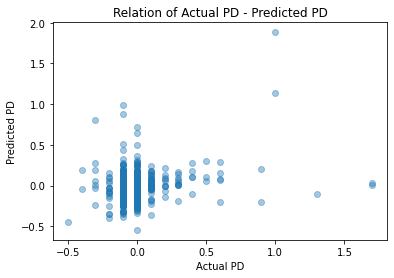

In [11]:
y_hat = tf.matmul(x_test * x_test, w1) + tf.matmul(x_test, w2) + bias

plt.scatter(y_test, y_hat, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [12]:
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_hat))

RMSE: 0.22399995
MAE: 0.13930055
